In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [29]:
#Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

Exploratory Data Analysis(EDA)

Train images shape: (50000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)


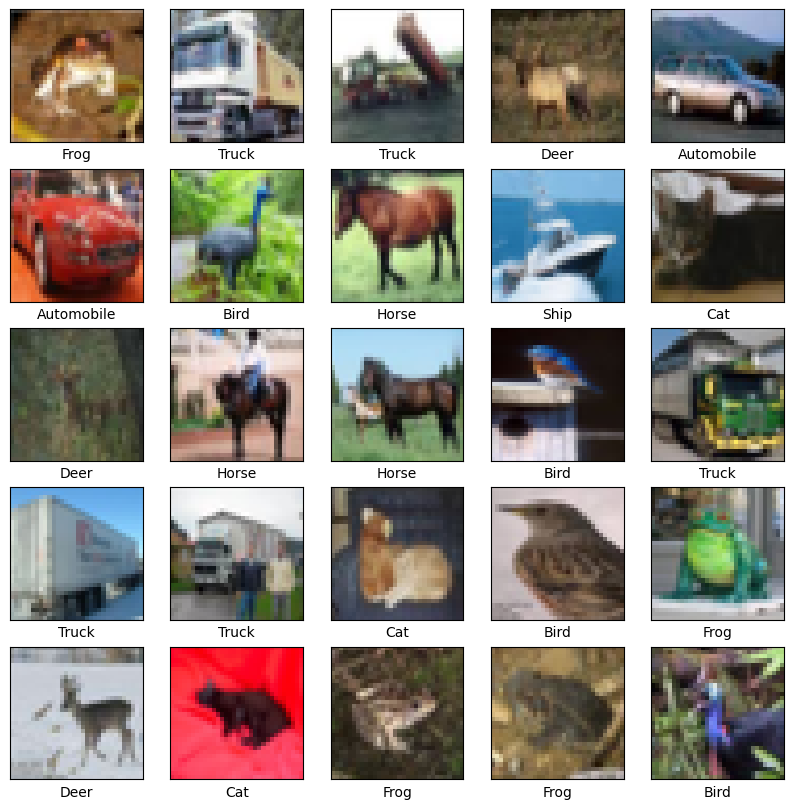

In [30]:
# Check dataset shapes
print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")

# Visualize some sample images
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Baseline Model

In [31]:
#Building a baseline model
baseline_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
#Compiling and training the model
baseline_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])
baseline_model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.3312 - loss: 1.8006 - val_accuracy: 0.5444 - val_loss: 1.2991
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.5575 - loss: 1.2427 - val_accuracy: 0.6008 - val_loss: 1.1323
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.6307 - loss: 1.0509 - val_accuracy: 0.6435 - val_loss: 1.0144
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.6718 - loss: 0.9420 - val_accuracy: 0.6703 - val_loss: 0.9483
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7028 - loss: 0.8518 - val_accuracy: 0.6795 - val_loss: 0.9272
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7289 - loss: 0.7761 - val_accuracy: 0.6908 - val_loss: 0.9018
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.7515 - loss: 0.7073 - val_accuracy: 0.6977 - val_loss: 0.8906
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7697 -

In [33]:
#Model evaluation
test_loss, test_acc = baseline_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7122 - loss: 0.8995
Test Accuracy: 0.708299994468689


Transfer Learning

In [34]:
#Loading a pre-trained model
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

In [35]:
#Adding a custom classification head
transfer_model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [36]:
#Compiling and training the model
transfer_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])
transfer_model.fit(train_images, train_labels, epochs=5, validation_split=0.2)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 226s 172ms/step - accuracy: 0.2035 - loss: 2.1820 - val_accuracy: 0.2622 - val_loss: 1.9656
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 195s 156ms/step - accuracy: 0.3072 - loss: 1.9102 - val_accuracy: 0.2971 - val_loss: 1.8898
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 206s 165ms/step - accuracy: 0.3249 - loss: 1.8606 - val_accuracy: 0.3306 - val_loss: 1.9114
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 193s 154ms/step - accuracy: 0.3392 - loss: 1.8259 - val_accuracy: 0.3419 - val_loss: 1.8319
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 209s 167ms/step - accuracy: 0.3551 - loss: 1.7948 - val_accuracy: 0.3505 - val_loss: 1.8107


In [38]:
#Fine-tuning the model 
#base_model.trainable = True
#transfer_model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), 
                       #loss='sparse_categorical_crossentropy',
                       #metrics=['accuracy'])
#transfer_model.fit(train_images, train_labels, epochs=5, validation_split=0.2)

Deployment

In [39]:
import os
print(os.listdir())

['.git', 'Assessmet.ipynb', 'Dataset', 'README.md']


In [40]:
url = "https://github.com/fwere12/-Image-Classification-Using-TensorFlow/raw/main/transfer_model.h5"
local_file = "transfer_model.h5"

In [45]:
transfer_model.save('transfer_model.h5')

In [51]:
#Loading the model
model = load_model(local_file)
print("Model loaded successfully.")

Model loaded successfully.


In [55]:
print(local_file)

transfer_model.h5


In [2]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

app = Flask(__name__)



@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        image = request.files['file']
        image = load_img(image, target_size=(224, 224))
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        prediction = model.predict(image)
        return jsonify({"prediction": prediction.tolist()})

    return "Upload an image"

if __name__ == '__main__':
    app.run(debug=False)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [27/Jan/2025 09:38:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/Jan/2025 09:38:38] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [27/Jan/2025 09:38:43] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/Jan/2025 09:40:56] "GET / HTTP/1.1" 200 -
